# Simple Position

In [1]:
import sys

In [2]:
for _ in range(2):
    try:
        import jdrones        
    except ModuleNotFoundError:
        print("jdrones not found, installing")
        !{sys.executable} -m pip install -q git+ssh://git@github.com/iwishiwasaneagle/jdrones/

In [3]:
import gymnasium
import jdrones
import jdrones.types

import pandas as pd
import numpy as np

from tqdm.auto import tqdm

pybullet build time: Feb  2 2023 13:13:41


In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

/home/jhewers/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from collections import deque

In [6]:
dt = 1/240
seed = 1337

initial_state = jdrones.types.State()
initial_state.pos = (0,0,2)

In [7]:
env = gymnasium.make("PIDTrajectoryDroneEnv-v0",dt=dt,initial_state=initial_state)
env = gymnasium.wrappers.TimeLimit(env, max_episode_steps=20)

b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_link

/home/jhewers/.local/lib/python3.10/site-packages/gymnasium/spaces/box.py:129: UserWarning: WARN: Box bound precision lowered by casting to float64
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [8]:
observations = deque()
setpoints = deque()

obs, info = env.reset(seed=seed)
trunc, term = False, False
while not (trunc or term):
    setpoint = env.action_space.sample()
    setpoints.append(setpoint)

    obs, _, term, trunc, info = env.step(setpoint)
    observations.append(obs)

2023-02-03 12:49:31.085 | DEBUG    | jdrones.envs.trajectory:step:97 - Completed 5963 steps in 1.19s (5002.32 it/s)
/home/jhewers/.local/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:181: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
2023-02-03 12:49:32.686 | DEBUG    | jdrones.envs.trajectory:step:97 - Completed 8709 steps in 1.60s (5454.69 it/s)
2023-02-03 12:49:34.085 | DEBUG    | jdrones.envs.trajectory:step:97 - Completed 7939 steps in 1.39s (5720.02 it/s)
2023-02-03 12:49:34.863 | DEBUG    | jdrones.envs.trajectory:step:97 - Completed 4477 steps in 0.77s (5796.47 it/s)
2023-02-03 12:49:36.577 | DEBUG    | jdrones.envs.trajectory:step:97 - Completed 9784 steps in 1.71s (5721.87 it/s)
2023-02-03 12:49:38.415 | DEBUG    | jdrones.envs.trajectory:step:97 - Completed 10529 steps in 1.83s (5751.17 it/s)
2023-02-03 12:49:38.673 | DEBUG    | jdrones.envs.tr

In [9]:
dfs = []
t_prev = 0
for i,obs in enumerate(observations):
    t = t_prev+np.linspace(0,len(obs)*dt,len(obs))
    df = pd.DataFrame(obs,columns=["x","y","z","qx","qy","qz","qw","phi","theta","psi","vx","vy","vz","p","q","r","P0","P1","P2","P3"],index=t)
    df.index.name = 't'
    df['segment'] = i
    dfs.append(df)
    t_prev = t[-1]+dt
    
df = pd.concat(dfs)
df = df.iloc[::50, :] # Select only every 5th row for performance
df

,x,y,z,qx,qy,qz,qw,phi,theta,psi,...,vy,vz,p,q,r,P0,P1,P2,P3,segment
t,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.020000,0.000000,0
0.208368,0.000124,-1.159156e-07,2.057585,-3.750797e-07,0.002218,-0.003560,0.999991,-0.000017,0.004436,-0.007120,...,-0.000004,0.158626,-0.000054,0.043492,-0.088159,137.546285,148.615442,188.434758,148.428568,0
0.416737,0.002286,-1.437475e-05,2.098728,4.039422e-06,0.007841,-0.018196,0.999804,-0.000277,0.015679,-0.036397,...,-0.000213,0.186346,-0.000277,0.058259,-0.192191,0.000000,0.000000,0.000000,0.000000,0
0.625105,0.010736,-1.689945e-04,2.124560,8.964326e-05,0.013391,-0.044289,0.998929,-0.001007,0.026764,-0.088628,...,-0.001632,0.120697,-0.000686,0.042574,-0.314802,166.716445,151.904515,123.532204,139.245312,0
0.833473,0.030117,-9.216747e-04,2.148856,4.260943e-04,0.015940,-0.081140,0.996575,-0.001738,0.031846,-0.162506,...,-0.006476,0.185921,-0.000806,0.001739,-0.401630,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551.333231,-1.741271,-3.971244e+00,2.713863,3.655280e-04,0.001733,-0.837167,0.546944,-0.002502,0.002508,-1.984175,...,-0.363647,-0.162464,0.001124,0.002083,0.087302,0.000000,0.000000,0.000000,0.000000,19
551.541585,-1.778911,-4.047352e+00,2.706796,-7.247088e-04,0.001393,-0.833435,0.552615,-0.003122,0.000331,-1.970594,...,-0.366096,-0.054471,-0.034771,0.017134,0.032916,185.839783,184.728648,110.694428,171.906111,19
551.749939,-1.814829,-4.122907e+00,2.706997,-5.602818e-03,-0.001788,-0.828387,0.560126,-0.003314,-0.011286,-1.952475,...,-0.355629,0.016300,-0.062360,0.026145,0.130909,0.000000,0.000000,0.000000,0.000000,19


In [10]:
df_long = df.melt(var_name='variable', value_name='value',id_vars=['segment'],ignore_index=False).reset_index()
df_long

,t,segment,variable,value
0,0.000000,0,x,0.000000
1,0.208368,0,x,0.000124
2,0.416737,0,x,0.002286
3,0.625105,0,x,0.010736
4,0.833473,0,x,0.030117
...,...,...,...,...
53015,551.333231,19,P3,0.000000
53016,551.541585,19,P3,171.906111
53017,551.749939,19,P3,0.000000
53018,551.958293,19,P3,122.176555


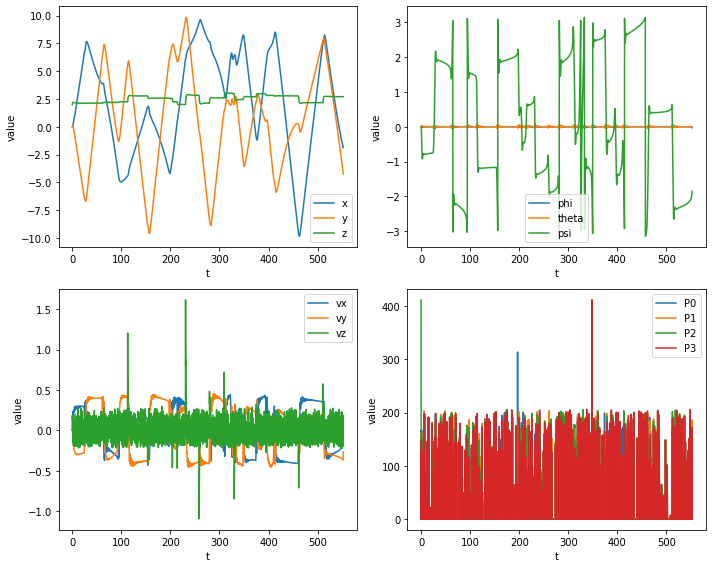

In [11]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.flatten()

sns.lineplot(data=df_long.query("variable in ('x','y','z')"), x='t',y='value',hue='variable',ax=ax[0])
ax[0].legend()

sns.lineplot(data=df_long.query("variable in ('phi','theta','psi')"), x='t',y='value',hue='variable',ax=ax[1])
ax[1].legend()

sns.lineplot(data=df_long.query("variable in ('vx','vy','vz')"), x='t',y='value',hue='variable',ax=ax[2])
ax[2].legend()

sns.lineplot(data=df_long.query("variable in ('P0','P1','P2','P3')"), x='t',y='value',hue='variable',ax=ax[3])
ax[3].legend()

fig.tight_layout()

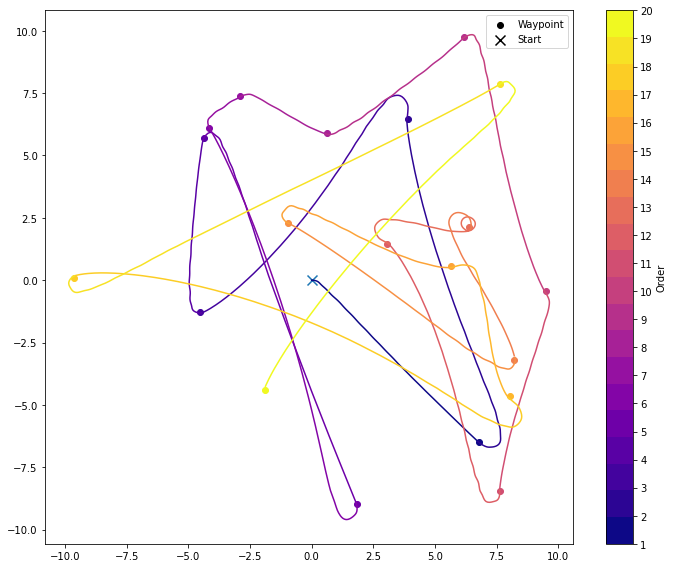

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
segments = df.segment.unique()
setpoints_data = np.array(setpoints)

cmap = mpl.cm.get_cmap('plasma', len(segments))
c = np.arange(1, len(segments) + 1)
dummie_cax = ax.scatter(c, c, c=c, cmap=cmap)
ax.cla()

for i,s in enumerate(df.segment.unique()):
    df_subset = df[df.segment==s]
    ax.plot(df_subset.x,df_subset.y,c=cmap(i))
    a= ax.scatter(setpoints_data[i,0],setpoints_data[i,1],color=cmap(i),label="Waypoint")
b = ax.scatter(df.iloc[0].x,df.iloc[0].y,100,marker='x',label='Start')
leg = ax.legend(handles=(a,b))
for legenhandle in leg.legendHandles:
    legenhandle.set_color('black')
fig.colorbar(dummie_cax, ticks=c,label="Order")
fig.tight_layout()